In [17]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
class ultimaComparacion():
    def __init__(self,tiempos,perdidas,promedios,nombresito):
        self.tiempos = tiempos
        self.registrosPerdidasGlobales = perdidas
        self.registroPromedios = promedios
        self.nombre = nombresito
        self.frecuenciaSampleo = 200 # Sampleo cada 200 datos
        pass
    def anadirDato(self,tiempo,perdida):
        self.tiempos.append(tiempo)
        self.registrosPerdidasGlobales.append(perdida)

In [9]:
fn = "/home/externo/Documents/nico/efficientPINN/pythontesis/v6/RESULTADOS/comparacionDeTiempo/terminados/2022-11-10-20-12-3-soluciones_uniformes.tar"

with open(fn,'rb') as file:
    a = pickle.load(file)
    file.close()
ej = a[0]


In [57]:
resultados = []
directorio = "/home/externo/Documents/nico/efficientPINN/pythontesis/v6/RESULTADOS/comparacionDeTiempo/terminados"
for filename in os.listdir(directorio):
    if 'soluciones_uniformes.tar' in filename:
        with open(os.path.join(directorio,filename),'rb') as file:
            a = pickle.load(file)
            file.close()
        for solucion in a:
            resultados.append(solucion)


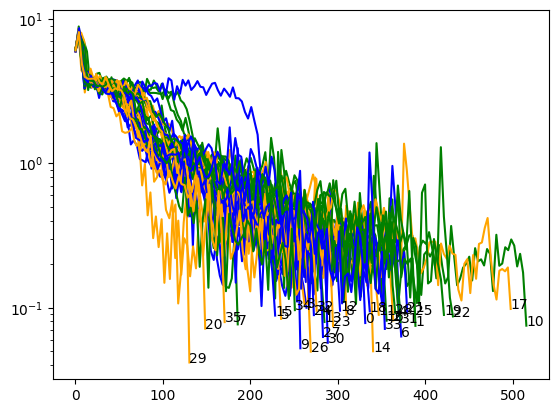

In [58]:
contador = 0
colores = ['blue','green','orange']
for i in resultados:
    ej = i
    plt.semilogy(ej.tiempos,ej.registrosPerdidasGlobales,color=colores[contador%3])
    plt.text(ej.tiempos[-1],ej.registrosPerdidasGlobales[-1],f'{contador}')
    contador += 1

In [59]:
tiempos = [i.tiempos[-1] for i in resultados]

158.03662157058716
213.0594391822815
268.08225679397583
323.10507440567017
378.1278920173645
433.15070962905884
488.1735272407532


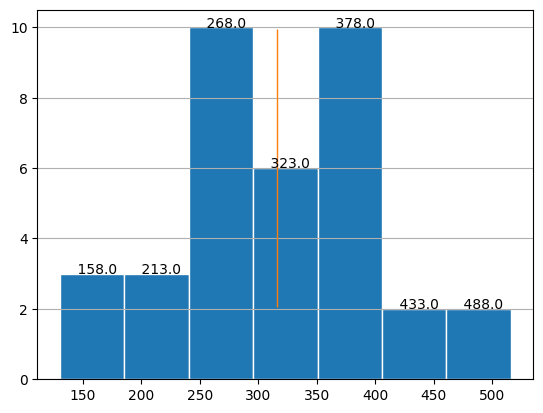

In [61]:
n, bins, inutil = plt.hist(tiempos,bins = 7,edgecolor = 'white')
plt.grid(axis='y')

for i in range(len(n)):
    centro = (bins[i]+bins[i+1])/2
    print(centro)
    plt.text(bins[i],n[i],f'    {np.round(centro,0)}',)

plt.plot(np.mean(tiempos),n[3],ms=200,marker= '|')

In [29]:
np.sqrt(len(tiempos))

5.196152422706632

In [62]:
np.mean(tiempos)

316.31888365745544